## Conformal Prediction of Multi-class structured label spaces

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

## Structure of the dataset

In [5]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### Lets observe what exactly is present in the dataset, by check some samples in the data

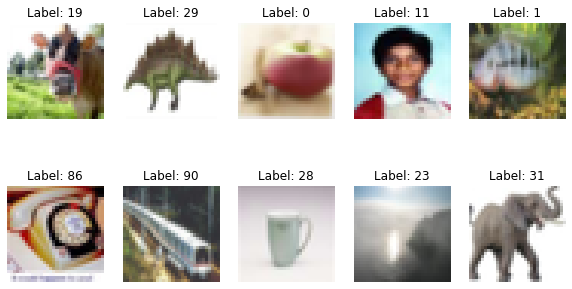

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(X_train[i])
    axes[i].set_title(f"Label: {y_train[i][0]}", fontsize=12)
    plt.subplots_adjust(hspace=0.5)
    axes[i].axis('off')
plt.show()

## Pre-Processing the dataset (Normalisation)

In [7]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

### Constructing Random CNN model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=1024, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 22s 521ms/step - loss: 4.4637 - accuracy: 0.0278 - val_loss: 4.1540 - val_accuracy: 0.0811
Epoch 2/10
40/40 [==============================] - 19s 466ms/step - loss: 4.0549 - accuracy: 0.0817 - val_loss: 3.8320 - val_accuracy: 0.1201
Epoch 3/10
40/40 [==============================] - 16s 408ms/step - loss: 3.8385 - accuracy: 0.1112 - val_loss: 3.6634 - val_accuracy: 0.1503
Epoch 4/10
40/40 [==============================] - 16s 403ms/step - loss: 3.6623 - accuracy: 0.1397 - val_loss: 3.5476 - val_accuracy: 0.1597
Epoch 5/10
40/40 [==============================] - 18s 463ms/step - loss: 3.5261 - accuracy: 0.1627 - val_loss: 3.4590 - val_accuracy: 0.1729
Epoch 6/10
40/40 [==============================] - 19s 466ms/step - loss: 3.4198 - accuracy: 0.1800 - val_loss: 3.5395 - val_accuracy: 0.1640
Epoch 7/10
40/40 [==============================] - 18s 438ms/step - loss: 3.3532 - accuracy: 0.1921 - val_loss: 3.3341 - val_accuracy: 0.1963

313/313 [==============================] - 3s 8ms/step - loss: 3.0400 - accuracy: 0.2610
Test Accuracy: 0.26100000739097595
313/313 [==============================] - 6s 13ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.72      0.52       100
           1       0.31      0.44      0.36       100
           2       0.20      0.14      0.16       100
           3       0.13      0.11      0.12       100
           4       0.11      0.04      0.06       100
           5       0.12      0.30      0.17       100
           6       0.24      0.19      0.21       100
           7       0.19      0.22      0.21       100
           8       0.29      0.27      0.28       100
           9       0.42      0.19      0.26       100
          10       0.00      0.00      0.00       100
          11       0.16      0.13      0.14       100
          12       0.27      0.21      0.24       100
          13       0.19      0.29      

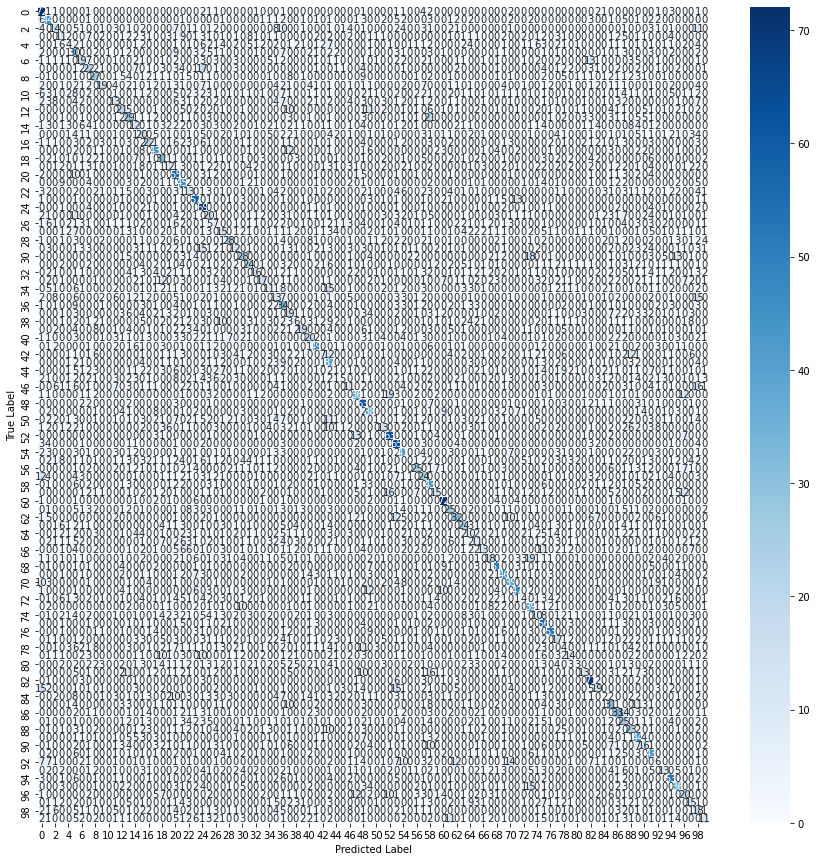

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute classification report
class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(100)])
print("Classification Report:\n", class_report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Baseline Model

In [13]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

9406464/9406464 [==============================] - 4s 0us/step


In [14]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
Total params: 2,965,156
Trainable params: 2,931,044
Non-trainable params: 34,112
_______________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=1024, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 155s 4s/step - loss: 4.4409 - accuracy: 0.0628 - val_loss: 5.9737 - val_accuracy: 0.0183
Epoch 2/10
40/40 [==============================] - 143s 4s/step - loss: 3.4821 - accuracy: 0.1944 - val_loss: 5.8287 - val_accuracy: 0.0220
Epoch 3/10
27/40 [===================>..........] - ETA: 50s - loss: 2.8333 - accuracy: 0.2955

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute classification report
class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(100)])
print("Classification Report:\n", class_report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

In [ ]:
batch_sizes = [64, 128, 256]
val_accuracies = {}

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")

    # Reset the model to its initial state
    tf.keras.backend.clear_session()
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2)

    # Log the validation accuracy for this batch size
    val_accuracies[batch_size] = max(history.history['val_accuracy'])

# Print out the validation accuracies
print("Validation accuracies for different batch sizes:", val_accuracies)

In [ ]:
from tensorflow.keras.layers import Input, Add, Activation
from tensorflow.keras.models import Model

def residual_block(X, filters, kernel_size=3, reduce=False, stride=1):
    shortcut = X

    if reduce:
        stride = 2
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='valid')(shortcut)

    X = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(X)

    X = Add()([X, shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
input_layer = Input(shape=(32, 32, 3))

X = Conv2D(16, (3, 3), padding='same')(input_layer)
X = Activation('relu')(X)

# First stack
for _ in range(18):
    X = residual_block(X, 16)

# Second stack
X = residual_block(X, 32, reduce=True)
for _ in range(17):
    X = residual_block(X, 32)

# Third stack
X = residual_block(X, 64, reduce=True)
for _ in range(17):
    X = residual_block(X, 64)

X = Flatten()(X)
X = Dense(100, activation='softmax')(X)

model = Model(inputs=input_layer, outputs=X)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
# Calculate basic conformity scores using class probability estimates
conformity_scores_basic = 1 - np.max(y_pred, axis=1)

# Create an identity matrix for semantic-based conformity scores (since no semantic information is available)
semantic_matrix = np.identity(100)  # Assuming you have 100 classes in CIFAR-100

# Calculate semantic-based conformity scores
conformity_scores_semantic = np.mean(semantic_matrix[y_pred_classes], axis=1)

# Define inductive conformity measures
def same_class_measure(y_true, y_pred, class_index):
    return (y_pred[:, class_index] == 1).astype(int)

def weighted_distances_measure(y_true, y_pred, class_index):
    return 1 / (1 + np.linalg.norm(y_true - y_pred, axis=1))

def distances_product_measure(y_true, y_pred, class_index):
    return np.prod(np.abs(y_true - y_pred), axis=1)

def tr_multiplication_measure(y_true, y_pred, class_index):
    return np.exp(np.sum(np.log(y_pred), axis=1))

def tr_exponent_measure(y_true, y_pred, class_index):
    return np.exp(-np.sum(np.abs(y_true - y_pred), axis=1))


# Calculate inductive conformity scores for each measure
inductive_scores_same_class = same_class_measure(y_true, y_pred, y_pred_classes)

inductive_scores_weighted_distances = np.zeros((len(y_true), 100))
for class_index in range(100):
    inductive_scores_weighted_distances[:, class_index] = weighted_distances_measure(y_true, y_pred, class_index)

inductive_scores_distances_product = np.zeros_like(inductive_scores_same_class)
for class_index in range(100):
    inductive_scores_distances_product[:, class_index] = distances_product_measure(y_true, y_pred, class_index)

inductive_scores_tr_multiplication = np.zeros_like(inductive_scores_same_class)
for class_index in range(100):
    inductive_scores_tr_multiplication[:, class_index] = tr_multiplication_measure(y_true, y_pred, class_index)

inductive_scores_tr_exponent = np.zeros_like(inductive_scores_same_class)
for class_index in range(100):
    inductive_scores_tr_exponent[:, class_index] = tr_exponent_measure(y_true, y_pred, class_index)

# Combine all conformity scores
conformity_scores = np.array([
    conformity_scores_basic,
    conformity_scores_semantic,
    inductive_scores_same_class,
    inductive_scores_weighted_distances,
    inductive_scores_distances_product,
    inductive_scores_tr_multiplication,
    inductive_scores_tr_exponent
])

# Calculate p-values using Monte Carlo approach
def calculate_p_values(conformity_scores):
    p_values = []
    for scores in conformity_scores:
        n_samples = len(scores)
        n_higher = np.sum(conformity_scores >= scores[:, np.newaxis], axis=0)
        p_value = (n_higher + 1) / (n_samples + 1)
        p_values.append(p_value)
    return np.array(p_values)

p_values = calculate_p_values(conformity_scores)

# Set significance level
alpha = 0.1

# Generate prediction sets based on p-values and significance level
prediction_sets = []
for i, p_value in enumerate(p_values):
    prediction_set = np.where(p_value >= alpha)[0]
    prediction_sets.append(prediction_set)

# Print prediction sets for each measure
for i, measure_name in enumerate(["Basic", "Semantic", "Same Class", "Weighted Distances", "Distances Product", "TR-Multiplication", "TR-Exponent"]):
    print(f"Prediction Set for {measure_name}: {prediction_sets[i]}")

### This is a complex system to test various aspects of the project, as the models we are using are requires HIGH GPU and Hyper parameter optimisation was to streneous!

The best parameters are:

Batch size = 10

Number of Epochs  = 10

Activation function = Relu

